In [210]:
import numpy as np
import scipy
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart
from skimage.draw import line_aa
import cv2
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import sewar
%matplotlib inline

In [220]:
img = cv2.imread("../images/ball.png",0)

img = scipy.ndimage.rotate(img, 45)
imgo = np.copy(img)
img = cv2.resize(img,(480,480))
# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape
print(imsize)

(480, 480)


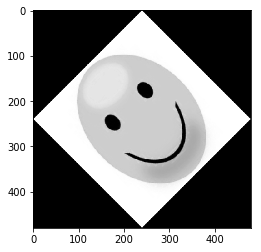

In [221]:
plt.imshow(img, cmap='gray')

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179.]
(679, 180)


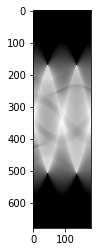

In [222]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
print(theta1)
sinogram1 = radon(img, theta=theta1, circle=False)
plt.imshow(sinogram1, cmap='gray')
imsize = sinogram1.shape
print(imsize)

In [223]:
# b = sinogram1[:,0]
# print(b.shape)
# print(b)
# print(np.mean(b))

In [224]:
# bt = np.flipud(b)
# sym = np.abs(b-bt)
# print(sym)
# print(np.mean(sym))

In [225]:
sinogram1t = np.flipud(sinogram1)
diff = np.abs(sinogram1 - sinogram1t)
diff_col = np.mean(diff,axis=0)
print(diff_col)
print(np.shape(diff_col))
min_idx = np.argmin(diff_col)
print(min_idx)

[1985.43151694 1997.76795555 2007.58548726 2016.4336216  2025.33226108
 2031.12755457 2031.87717378 2027.34820532 2016.80837563 1996.30746079
 1967.310622   1931.6796238  1895.5280074  1858.65869716 1827.73804543
 1804.48226451 1783.55801972 1763.82075284 1738.01967607 1710.76351724
 1681.9946706  1654.13207378 1623.93341372 1594.75948234 1565.50849628
 1534.51094546 1500.0826716  1460.48906172 1416.30972516 1375.93799232
 1331.31299333 1283.86437696 1228.70118096 1165.64205387 1099.57785932
 1027.71347863  953.14928068  873.96316757  791.48661242  705.50781613
  614.84714845  519.97547988  422.72150904  328.59909745  235.88459
  182.67986045  153.18023935  219.50732709  317.08399009  419.77467603
  521.28114862  618.52517091  709.45690481  796.90767559  881.07018761
  961.0402602  1036.65529687 1108.66180664 1178.97116416 1245.95428768
 1309.53413693 1371.00883178 1427.50556915 1483.30024769 1534.25864171
 1583.4945345  1624.00788158 1664.00633514 1698.31676368 1731.82353204
 1766.035

240
-167


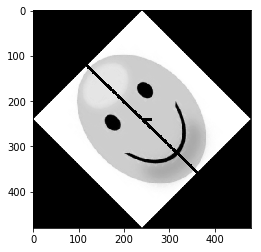

In [226]:
# img = cv2.imread("../images/ball90.png",0)
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
c0 = np.rint(240*np.cos((134/180)*3.14)).astype(int)
s0 = np.rint(240*np.sin((134/180)*3.14)).astype(int)
print(r0)
print(c0)
img = cv2.line(img,(240 + s0,240 - c0),(240 - s0,240 + c0),(0,0,0),5)
img = cv2.line(img,(240,240),(260,240),(0,0,0),5)
plt.imshow(img, cmap='gray')



In [40]:
cos(5)


NameError: name 'cos' is not defined